In [1]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [40]:
col_frames = os.listdir('newframes/')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))
col_images=[]
for i in tqdm_notebook(col_frames):
    img = cv2.imread('newframes/'+i)
    col_images.append(img)

C:\Users\PIYUSH~1\AppData\Local\Temp/ipykernel_6764/1164305739.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(col_frames):


  0%|          | 0/1014 [00:00<?, ?it/s]

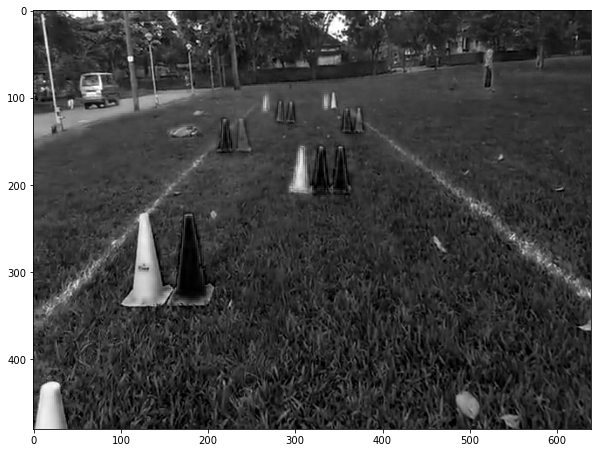

In [48]:
idx = 255
plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()

In [49]:
stencil = np.zeros_like(col_images[idx][:,:,0])
cone = np.zeros_like(col_images[idx][:,:,0])

polygon = np.array([[0,480],[0,330], [240,100], [380,100], [640,320], [640,480]])

cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

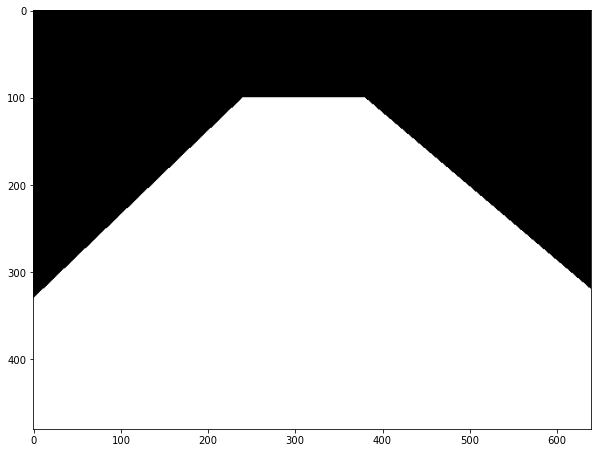

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

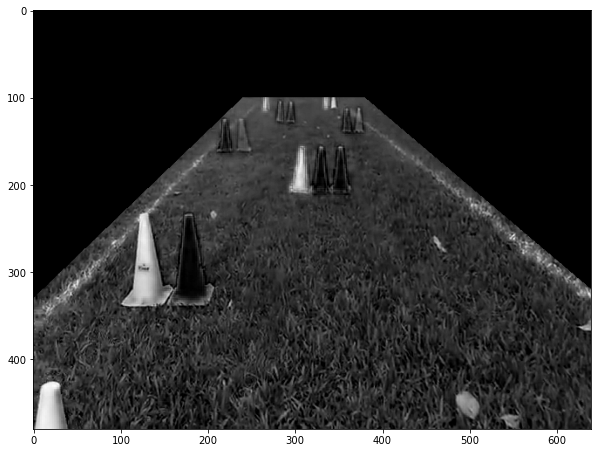

In [50]:
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

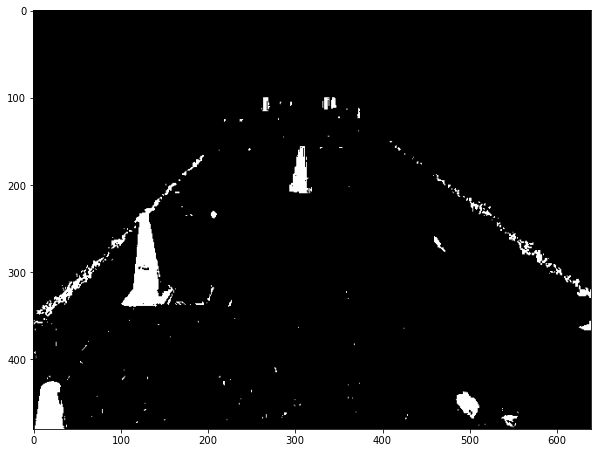

In [53]:
ret, thresh = cv2.threshold(img, 110, 100, cv2.ADAPTIVE_THRESH_MEAN_C)
img1=thresh
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

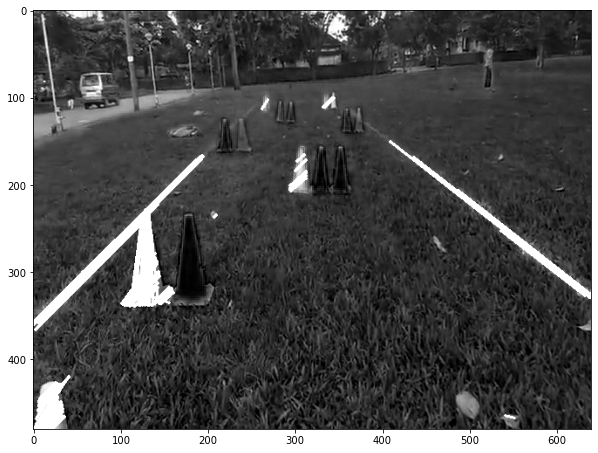

In [57]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 60, maxLineGap=20)

dmy = col_images[idx][:,:,0].copy()

for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

In [59]:
cnt = 0

for img in tqdm_notebook(col_images):
  masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)
  ret, thresh = cv2.threshold(masked, 110, 100, cv2.ADAPTIVE_THRESH_MEAN_C)
  lines = cv2.HoughLinesP(thresh, 2, np.pi/180, 60, maxLineGap=20)
  dmy = img.copy()
  try:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 2)
  
    cv2.imwrite('newdetected/'+str(cnt)+'.png',dmy)
  
  except TypeError: 
    cv2.imwrite('newdetected/'+str(cnt)+'.png',img)

  cnt+= 1

C:\Users\PIYUSH~1\AppData\Local\Temp/ipykernel_6764/1513438305.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img in tqdm_notebook(col_images):


  0%|          | 0/1014 [00:00<?, ?it/s]

In [72]:
pathIn= 'newdetected1/'
pathOut = 'roads_v5.mp4'
fps = 120

In [73]:
from os.path import isfile, join

files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [74]:
frame_list = []

for i in tqdm_notebook(range(len(files))):
    filename=pathIn + files[i]
    
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    frame_list.append(img)

C:\Users\PIYUSH~1\AppData\Local\Temp/ipykernel_6764/2748976611.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(files))):


  0%|          | 0/1014 [00:00<?, ?it/s]

In [75]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_list)):
    
    out.write(frame_list[i])

out.release()